In [65]:
from PIL import Image
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

***Train Pairs Generator***

In [148]:
sub_name='GCA062ACA'
sub_tissue_name='GCA062ACA_TISSUE01'
set_dir=f'/fs5/p_masi/baos1/rudravg/MXIF/MXIF/Helmsley/MxIF/Set03/{sub_name}/Registered'
mask_file=f'/fs5/p_masi/baos1/rudravg/MXIF/MXIF/Helmsley/MxIF/Set03/{sub_name}/Registered/{sub_tissue_name}_RetentionMask.tif'
Image.MAX_IMAGE_PIXELS = None

In [149]:
mask = np.array(Image.open(mask_file))

In [150]:
file_names = [name for name in os.listdir(set_dir) if sub_tissue_name in name and 'DAPI' in name]
sorted_file_names = sorted(file_names, key=lambda name: int(name.split('_ROUND_')[1].split('.')[0]))
mask=np.array(Image.open(mask_file))
round_numbers=[0,16,14,17]
orig_file=(np.array(Image.open(os.path.join(set_dir,sorted_file_names[round_numbers[0]]))))*mask/255.
file_1=(np.array(Image.open(os.path.join(set_dir,sorted_file_names[round_numbers[1]]))))*mask/255.
file_2=(np.array(Image.open(os.path.join(set_dir,sorted_file_names[round_numbers[2]]))))*mask/255.
file_3=(np.array(Image.open(os.path.join(set_dir,sorted_file_names[round_numbers[3]]))))*mask/255.

In [151]:
np.max(file_3)

1.0

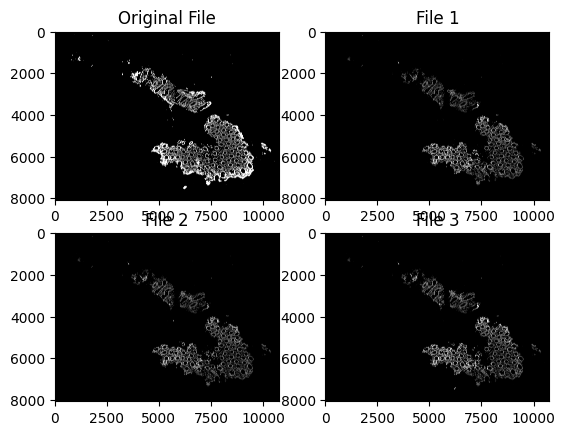

In [152]:
plt.figure()

# Add a subplot for the original file
plt.subplot(2, 2, 1)
plt.imshow(orig_file, cmap='gray')
plt.title('Original File')

# Add a subplot for file 1
plt.subplot(2, 2, 2)
plt.imshow(file_1, cmap='gray')
plt.title('File 1')

# Add a subplot for file 2
plt.subplot(2, 2, 3)
plt.imshow(file_2, cmap='gray')
plt.title('File 2')

# Add a subplot for file 3
plt.subplot(2, 2, 4)
plt.imshow(file_3, cmap='gray')
plt.title('File 3')

# Display the figure
plt.show()

In [153]:
window_size = (1024, 1024)

# Define directories
output_dir = '/home-local/rudravg/test_DAPI/1024_Dataset_V2'
target_dir = os.path.join(output_dir, 'target_images')
source_dir = os.path.join(output_dir, 'source_images')

# Create directories if they don't exist
os.makedirs(target_dir, exist_ok=True)
os.makedirs(source_dir, exist_ok=True)

pairs_file = os.path.join(output_dir, 'pairs.txt')

# Open pairs file for writing
with open(pairs_file, 'a') as f:
    for i in range(0, mask.shape[0], window_size[0]):
        for j in range(0, mask.shape[1], window_size[1]):
            window_mask = mask[i:i+window_size[0], j:j+window_size[1]]
            
            if np.count_nonzero(window_mask) > 1000 and window_mask.shape == window_size:
                # Save the cut pieces of the orig_file in target_dir
                window_orig = orig_file[i:i+window_size[0], j:j+window_size[1]]
                target_path = os.path.join(target_dir, f'{sub_name}_{sub_tissue_name}_{round_numbers[0]}_{i}_{j}.npy')
                np.save(target_path, window_orig)


                
                # Cut file_1, file_2 and file_3 in the same way and save their corresponding pieces in source_dir
                for file, round_number in zip([file_1, file_2, file_3], round_numbers[1:]):
                    window_file = file[i:i+window_size[0], j:j+window_size[1]]
                    source_path = os.path.join(source_dir, f'{sub_name}_{sub_tissue_name}_{round_number}_{i}_{j}.npy')
                    np.save(source_path, window_file)

                    # Append a space separated line in pairs_file with the first part being path to the source image and the second part being path to the target image
                    f.write(f'{source_path} {target_path}\n')

***Val Pairs Generator***

In [178]:
sub_name='GCA045TIB'
sub_tissue_name='GCA045TIB_TISSUE01'
set_dir=f'/fs5/p_masi/baos1/rudravg/MXIF/MXIF/Helmsley/MxIF/Set02/{sub_name}/Registered'
mask_file=f'/fs5/p_masi/baos1/rudravg/MXIF/MXIF/Helmsley/MxIF/Set02/{sub_name}/Registered/{sub_tissue_name}_RetentionMask.tif'
Image.MAX_IMAGE_PIXELS = None
mask = np.array(Image.open(mask_file))

In [179]:
file_names = [name for name in os.listdir(set_dir) if sub_tissue_name in name and 'DAPI' in name]
sorted_file_names = sorted(file_names, key=lambda name: int(name.split('_ROUND_')[1].split('.')[0]))
mask=np.array(Image.open(mask_file))
round_numbers=[0,13]
orig_file=(np.array(Image.open(os.path.join(set_dir,sorted_file_names[round_numbers[0]]))))*mask/255.
file_1=(np.array(Image.open(os.path.join(set_dir,sorted_file_names[round_numbers[1]]))))*mask/255.

In [180]:
window_size = (1024, 1024)

# Define directories
output_dir = '/home-local/rudravg/test_DAPI/1024_Dataset_V2'
target_dir = os.path.join(output_dir, 'val_target_images')
source_dir = os.path.join(output_dir, 'val_source_images')

# Create directories if they don't exist
os.makedirs(target_dir, exist_ok=True)
os.makedirs(source_dir, exist_ok=True)

# Define pairs file
pairs_file = os.path.join(output_dir, 'val_pairs.txt')

# Open pairs file for appending
with open(pairs_file, 'a') as f:
    for i in range(0, mask.shape[0], window_size[0]):
        for j in range(0, mask.shape[1], window_size[1]):
            window_mask = mask[i:i+window_size[0], j:j+window_size[1]]
            
            if np.count_nonzero(window_mask) > 200 and window_mask.shape == window_size:
                # Save the cut pieces of the orig_file in target_dir
                window_orig = orig_file[i:i+window_size[0], j:j+window_size[1]]
                target_path = os.path.join(target_dir, f'{sub_name}_{sub_tissue_name}_{round_numbers[0]}_{i}_{j}.npy')
                np.save(target_path, window_orig)
                
                # Cut file_1 and save its corresponding piece in source_dir
                window_file_1 = file_1[i:i+window_size[0], j:j+window_size[1]]
                source_path = os.path.join(source_dir, f'{sub_name}_{sub_tissue_name}_{round_numbers[1]}_{i}_{j}.npy')
                np.save(source_path, window_file_1)
                    
                # Append a space separated line in pairs_file with the first part being path to the source image and the second part being path to the target image
                f.write(f'{source_path} {target_path}\n')